In [ ]:
# Importing needed modules
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/Colab Notebooks/Computational Methods/Week09')

# Loading the data

datafile = pd.read_csv('LoLaLAB.csv',sep=',',names=['longitude','latitude','LAB_depth'])
print(datafile)

Mounted at /content/drive/
       longitude  latitude  LAB_depth
0         -179.0      89.0      95.88
1         -177.0      89.0      96.04
2         -175.0      89.0      96.08
3         -173.0      89.0      96.11
4         -171.0      89.0      96.15
...          ...       ...        ...
16195      171.0     -89.0     219.16
16196      173.0     -89.0     218.93
16197      175.0     -89.0     218.71
16198      177.0     -89.0     218.52
16199      179.0     -89.0     218.33

[16200 rows x 3 columns]


In [ ]:
thermal_conductivity= 3 #W /(m⋅ K)
surf_temp = 288 # in K
asthenosphere_temp = 2000 #in K
Dl = datafile['LAB_depth']*10**3

# Defining the equation

def equation(thermal_conductivity, surf_tem, astheno_temp):
  heat_flux = -thermal_conductivity * (surf_temp-asthenosphere_temp)/Dl
  return heat_flux
  print(heat_flux)

datafile['qs']=equation(thermal_conductivity, surf_temp, asthenosphere_temp)
print(datafile)


       longitude  latitude  LAB_depth        qs
0         -179.0      89.0      95.88  0.053567
1         -177.0      89.0      96.04  0.053478
2         -175.0      89.0      96.08  0.053455
3         -173.0      89.0      96.11  0.053439
4         -171.0      89.0      96.15  0.053417
...          ...       ...        ...       ...
16195      171.0     -89.0     219.16  0.023435
16196      173.0     -89.0     218.93  0.023460
16197      175.0     -89.0     218.71  0.023483
16198      177.0     -89.0     218.52  0.023504
16199      179.0     -89.0     218.33  0.023524

[16200 rows x 4 columns]


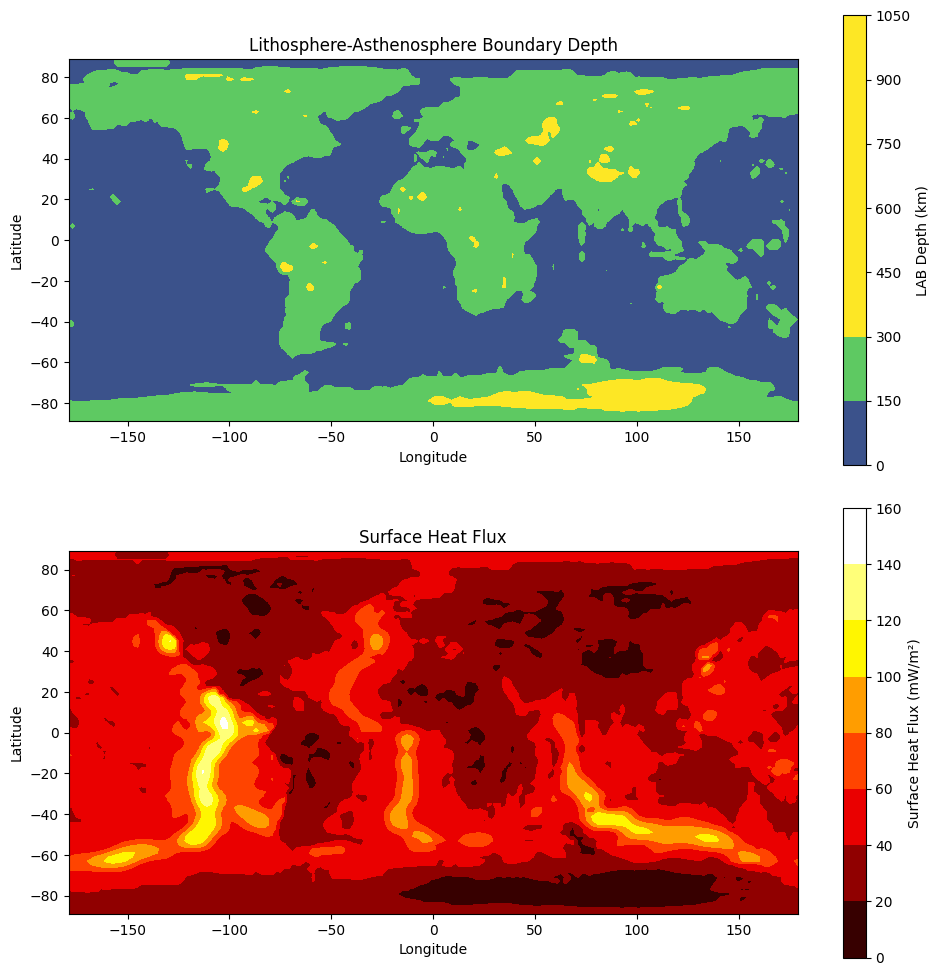

In [ ]:
qs= np.array(datafile['qs'].values).reshape(90,180)
longitude= np.array(datafile['longitude'].values).reshape(90,180)
latitude = np.array(datafile['latitude'].values).reshape(90,180)
LAB_depth = np.array(datafile['LAB_depth'].values).reshape(90,180)

# Converting from W/m² to mW/m².
qs_milli = qs * 1000

plt.figure(figsize=(10, 10)) # Adjust figure size for better readability

# First plot
plt.subplot(2,1,1)
plt.contourf(longitude, latitude, LAB_depth, cmap='viridis')
cbar1 = plt.colorbar()
cbar1.set_label('LAB Depth (km)')
plt.clim(0,300)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lithosphere-Asthenosphere Boundary Depth')
plt.gca().set_aspect('equal', adjustable='box')

# Second Subplot
plt.subplot(2,1,2)
plt.contourf(longitude, latitude, qs_milli, cmap='hot')
cbar2 = plt.colorbar()
cbar2.set_label('Surface Heat Flux (mW/m²)')
plt.clim(0,150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Surface Heat Flux')
plt.gca().set_aspect('equal', adjustable='box')


plt.tight_layout()

plt.show()